# Reconhecimento de Collatus


- O que é o filamento?
- No que eles são formados?
- De onde vem os filamentos?
- Onde entra o trabalho de data science?
- Ruído de Perlin
- Imagem do satelite 
- Algum método de reconhecimento (Flood fill, skeletonize, etc...)
- Conclusão breve

## O que é o filamento?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Para que possamos entender o que são os filamentos, talvez seja necessário fazer uma outra pergunta:Quais são os corpos mais massivos do universo? Talvez seguindo esta linha de raciocínio conseguimos chegar em alguma resposta em que queira. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tome inicialmente o referencial aqui na planeta Terra, ao sairmos desta referencial, vemos a Terra e mais inúmeras planetas/estrelas que estão girando ao redor do Sol (que é uma estrela); vamos então afastar mais um pouco o nosso ponto referencial, olhando de uma escala maior podemos ver uma galáxia; se afastamos mais um pouco vemos mais de uma galáxias, ou chamado de grupos de galáxia; e depois vemos os super grupos de galáxias, e é exatamente quando está na escala de super grupo de galáxias, vemos um espécie de "braço" ligando cada um destas galáxias, este é o chamado de filamento.

## No que eles são formados, e qual a força (ou o campo) que forma esses aglomerados?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Estes são formadas pelo campo de gravitação. Quando tem massa grande, a única força que pesa é a gravidade, corpos muito grande é tudo pela gravidade, como a Terra está orbitando ao redor do Sol não por eletronegatividade ou campo magnétismo, mas sim pela gravidade. Porém existe um igrediente na gravidação que se chama instabilidade gravitacional, que é o seguinte:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Seja dois corpos quaisquer, e afirmamos que não existe o colapso gravitacional na colisão direta, mas sim quando tem muitos corpos, devido a instabilidade gravitacional, ele irá percorrer numa trajatoria aleatoria que passa por lado do outro, se atrai de volta, passa de novo pelo lado do outro e ser atraido de volta novamente, parece zig-zag no caminho aleatório, até que se colapsar. Então eles vão passar entre eles, eles tem movimentos não lineares, ele vai ser atraida e acelerada, e acelera tanto que a atração perde a colisão e passa, e atrai e acelera, até que ele colapsar.  Por isso que um corpo entra em rotação, a Terra está caindo no Sol, é como ela colapsar o Sol, e ela realmente vai mesmo, caso considerar o tempo para infinito ela vai cair para o sol. Por isso que o satélite cai de volta para a terra, solta o satélite numa orbita fechada, comece a orbitar e vai cair, mas esse caminho é instável. E se um terceiro corpo passar por outro lado deste, pode haver a  pertubação. Então, se deixar isso no supercomputador e deixa a simulação de n-corpos rodar, variando no tempo que é o redshift, partindo do universo lá trás, que é o redshift alto, em geral comece por z=50, e deixa a simulação até o z=0, que é o universo atual, e no universo atual as estruturas que vai aparecer são os filamentos voids. 

## De onde vem os filamentos ?

Vem da atração gravitacional entre galaxias, uma caixa cosmologica que tem da ordem maior ou igual a 100 Mpc, é um produto natural devido a dois igredientes, a gravidade ou a força gravitacional e a sua instabilidade gravitacional.
A instabilidade gravitacional vira a ser o problema de n-corpos, tudo mundo atrapalha tudo mundo, passa por aqui e vai tal... mas no final das contas se colapsa, quando colapsa tem essa estrutura de vazios e filamentos.

## Onde entra o trabalho de data science?

hoje o pessoal observam os dados reais, os telescopios está cada vez olhando o redshift mais longe, com maior e monte de galáxia, possibilitando a composição de um mosaico através das observações, só que com redshift muito pequeno.

As figuras do SDSS nós dá exatamento os filamentos e vazios, mas a pergunta é a geometria e a distribuição estatística do numero, tamanho de filamentos voids bate com os dados simulados?  É isso que queriamos saber, isso que é o data science, precisamos tirar esta sinformação de lá, e comparar, pois aqui pode mudar a condição inicial, pode fazer ser homogeneo, todos galaxias iguais, todas galaxias diferentes, pode fazer com modelo cosmológico padrão, pode fazer com modelo cosmologico não homogeneo, pode fazer muitos ingredientes na simulação, que tem várias condições iniciais quando for fazer as similações.

Ao colocar estes condições iniciais, o simulador vai dar um resultado e vai ter que comparar com a real, então qual é o modelo que descreve melhor? Pode ser que cosmologia não homogenea também tem o mesmo numero de filamentos voids, que é o que a gente queremos saber.

Resumindo, filamentos vem naturalmente e é o resultado natural do calapso gravitacional de muitos corpos que são galaxias, onde a propriedade de instabilidade gravitacional é inerente a quantidade de corpos. E é devido a isso que vai causar filamentos voids. 

## Ruído de Perlin

Quando extrai um slice de um cubo cosmológica, o filamento e o vazio está no slice 2D, que é muito parecido com o ruído de Perlin, o ruído de Perlin gera aquela estrutura no 2D, por isso escolhemos este modelo para dar primeira iniciativa e tentativa de manipulação, para posteriormente tocar de fato uma imagem real do universo obtido do satélite.

In [1]:
import noise
import numpy as np
import os
from scipy import misc
import matplotlib.pyplot as plt

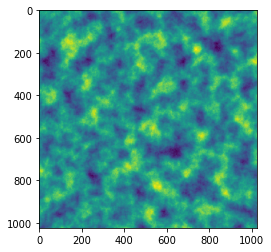

In [2]:
shape = (1024,1024)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=0)
        
#misc.toimage(world).show()

plt.figure()
plt.imshow(world)
plt.show()

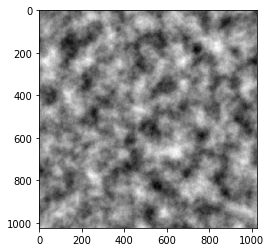

In [3]:
plt.figure()
plt.imshow(world, cmap='binary')
plt.show()

In [4]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
from PIL import Image

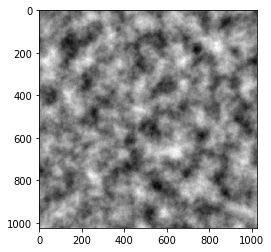

In [5]:
x=img.imread("PerlinNoise.BMP")
np.savetxt('PerlinNoise.txt',x)
plt.figure()
plt.imshow(x, cmap='binary')
plt.show()

In [6]:
media = np.mean(x)
Q1 = np.percentile(x,25)
mediana = np.median(x)
Q3 = np.percentile(x,75)
maximo=np.max(x) 
minimo=np.min(x)
altura=len(x)
largura=len(x[0])
x2=np.ones([altura,largura])
x3=np.zeros([altura,largura])

In [7]:
for i in range(0,altura):
    for j in range(0,largura):
        if x[i][j]>media :
            x2[i][j]=0

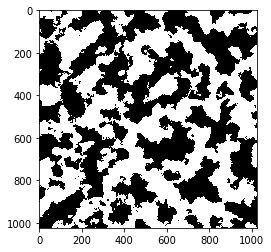

In [8]:
plt.figure()
plt.imshow(x2, cmap='binary')
plt.show()


In [9]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
from PIL import Image
import floodfill as ff

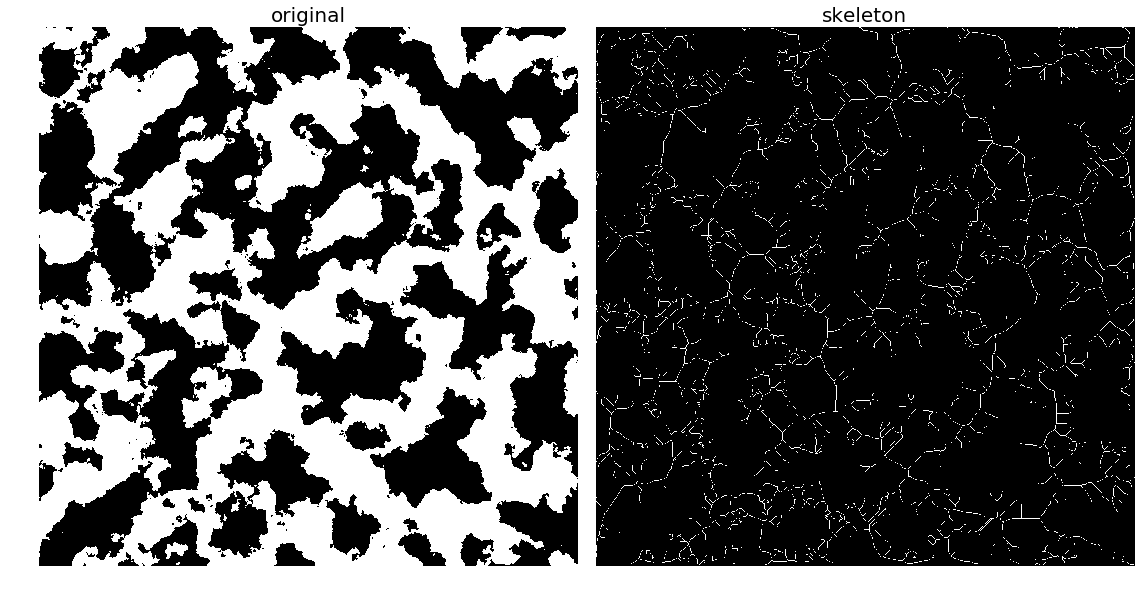

In [18]:
image = invert(x2)

skeleton = skeletonize(image)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 16),sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [25]:
from skimage.morphology import medial_axis, skeletonize, skeletonize_3d
from skimage.util.colormap import magma
from skimage.morphology import skeletonize, thin

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


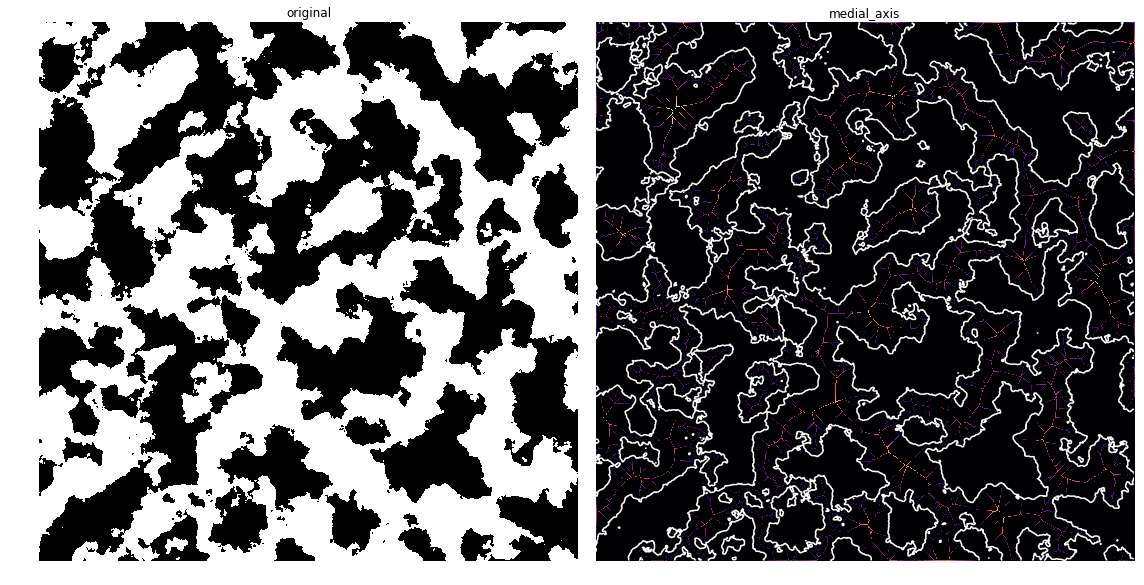

In [23]:
data = np.copy(image)

skel, distance = medial_axis(data, return_distance=True)

skeleton = skeletonize(data)
skeleton3d = skeletonize_3d(data)

dist_on_skel = distance * skel

fig, axes = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap=magma, interpolation='nearest')
ax[1].contour(data, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

fig.tight_layout()
plt.show()

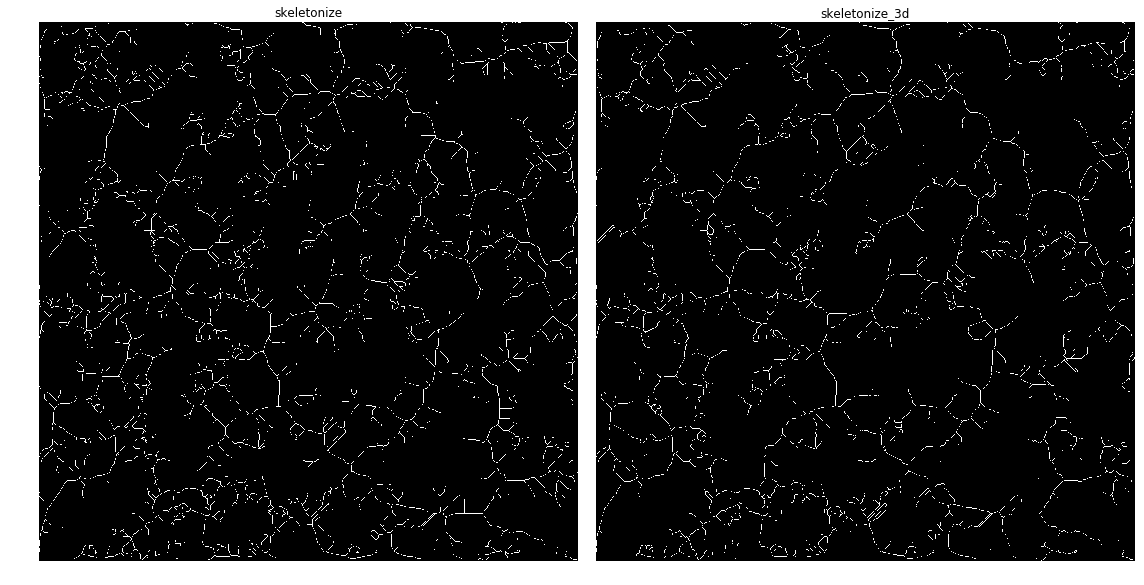

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('skeletonize')
ax[0].axis('off')

ax[1].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('skeletonize_3d')
ax[1].axis('off')

fig.tight_layout()
plt.show()

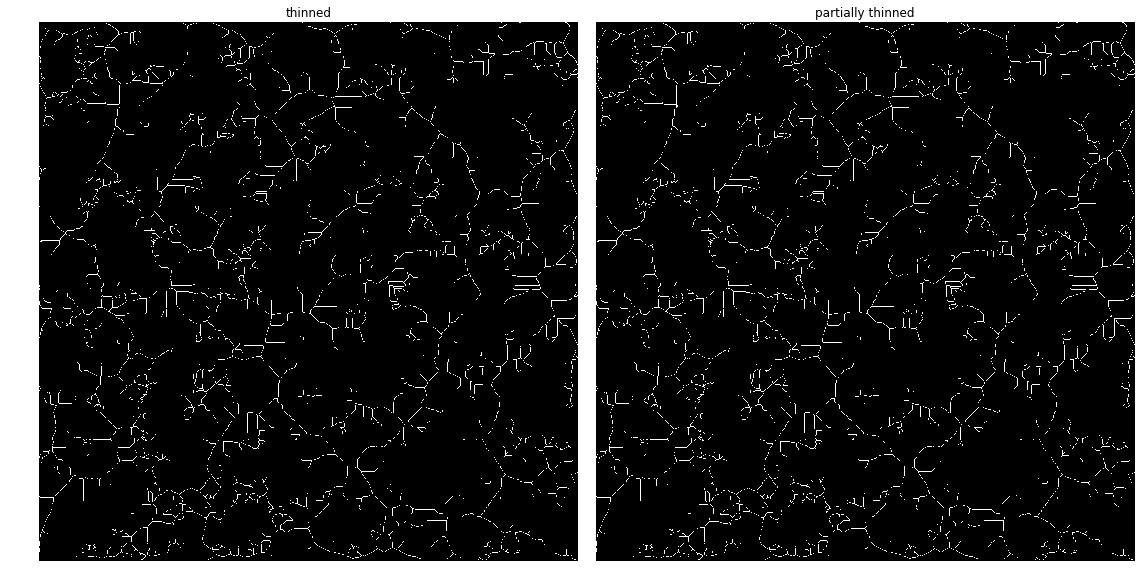

In [38]:
thinned = thin(image)
thinned_partial = thin(image, max_iter=70)  #max_iter=70 já é igual o thinned

fig, axes = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(thinned, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('thinned')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('partially thinned')
ax[1].axis('off')

fig.tight_layout()
plt.show()

## Imagem do satélite

In [13]:
from skimage.morphology import skeletonize
from skimage import draw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
from PIL import Image
import floodfill as ff

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


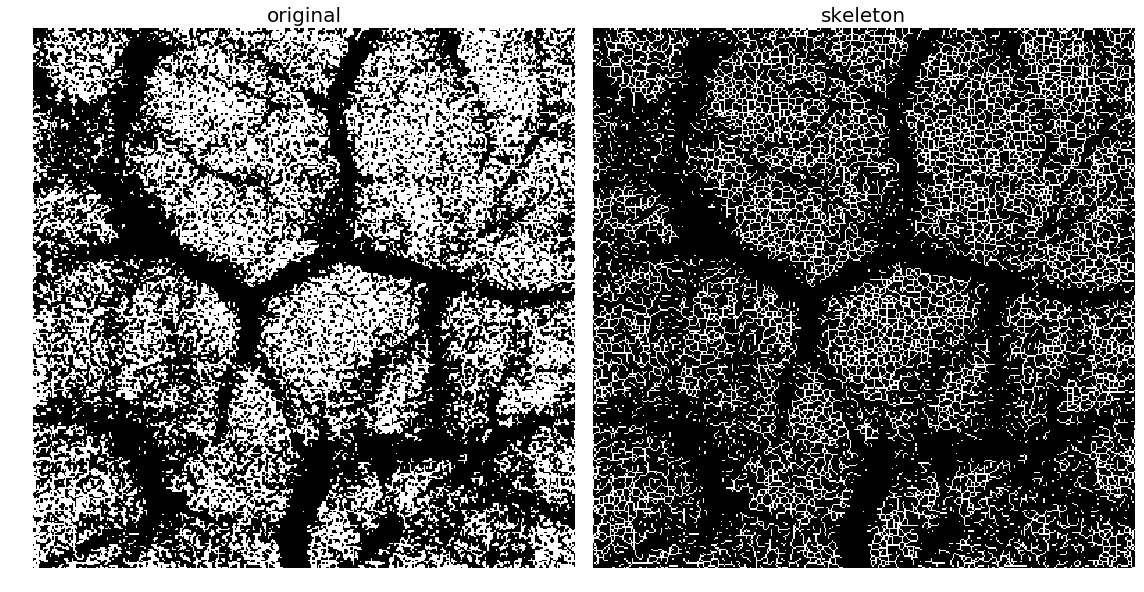

In [56]:
image = Image.open("virgo_z_0.png")
_image = np.asarray(image) 
media = np.mean(_image)
_tmp = np.copy(_image)
_tmp[:,:,2][_image[:,:,2]>media] = 1
_tmp[:,:,2][_image[:,:,2]<=media] = 0

nfig = _tmp[:,:,2]

skeleton = skeletonize(nfig)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 16), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})

ax1.imshow(nfig, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('original', fontsize=20)

ax2.imshow(skeleton, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

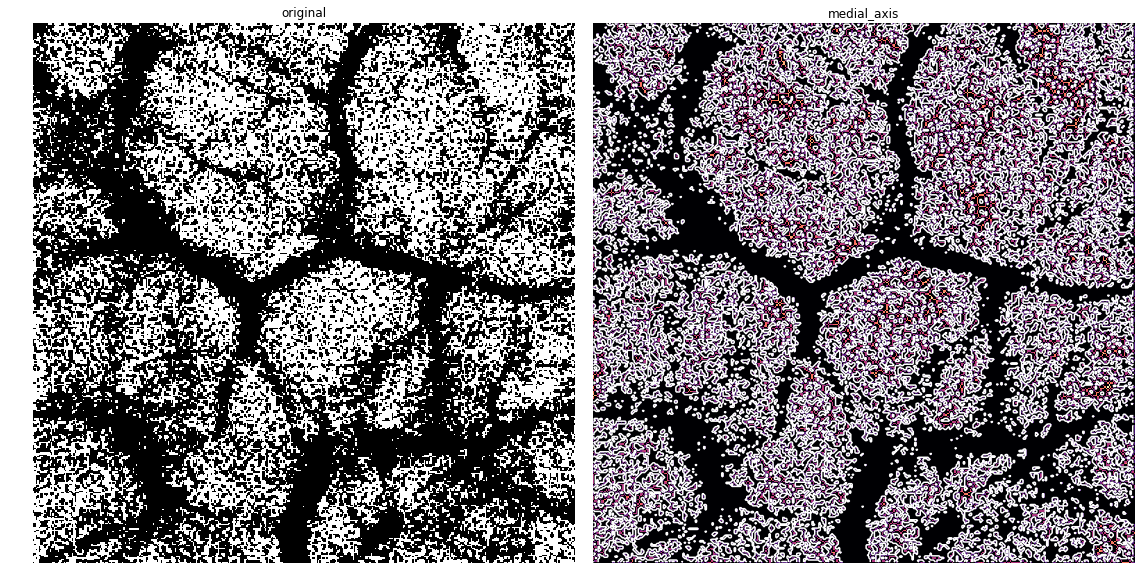

In [57]:
data = np.copy(nfig)

skel, distance = medial_axis(data, return_distance=True)

skeleton = skeletonize(data)
skeleton3d = skeletonize_3d(data)

dist_on_skel = distance * skel

fig, axes = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap=magma, interpolation='nearest')
ax[1].contour(data, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

fig.tight_layout()
plt.show()

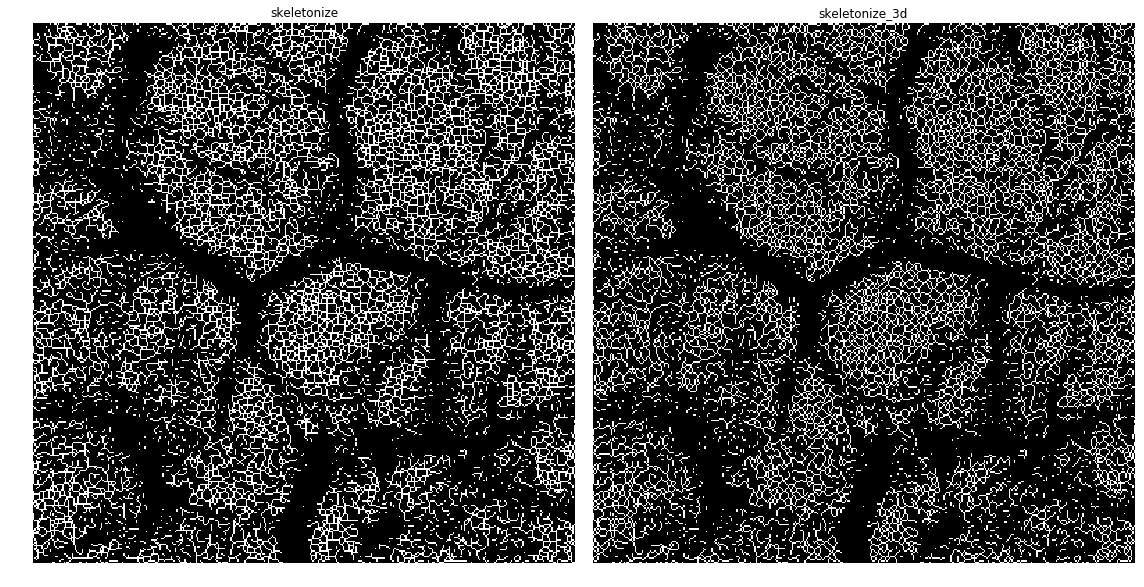

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('skeletonize')
ax[0].axis('off')

ax[1].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('skeletonize_3d')
ax[1].axis('off')

fig.tight_layout()
plt.show()

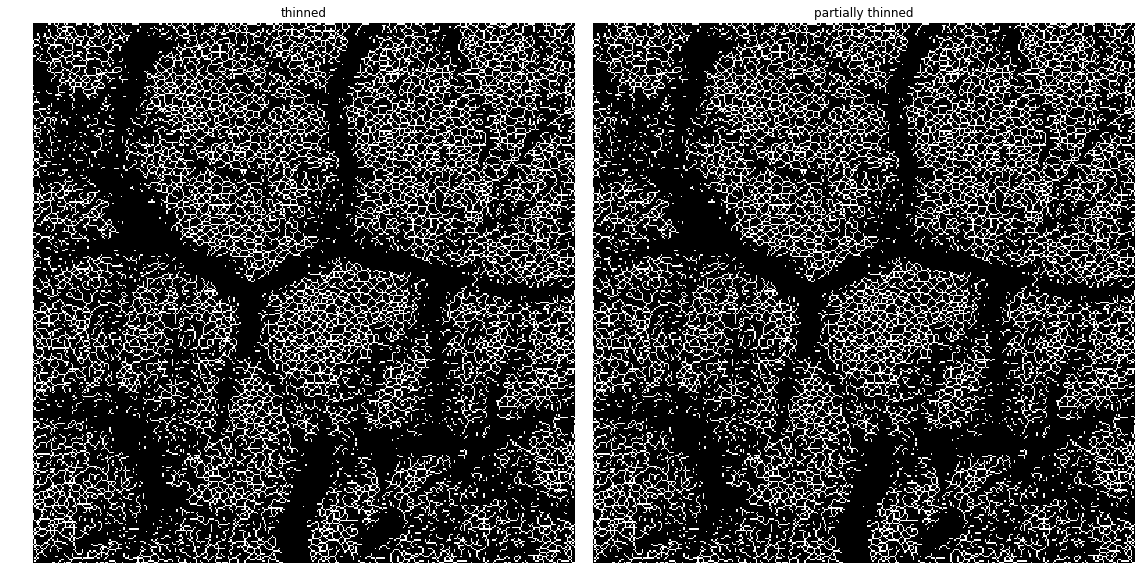

In [74]:
thinned = thin(nfig)
thinned_partial = thin(nfig, max_iter=25)  

fig, axes = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(thinned, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('thinned')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('partially thinned')
ax[1].axis('off')
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
fig.tight_layout()
plt.show()

## Conclusão breve

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Até a presente etapa, foi aplicado uma técnica da morfologia matemática, conhecida como esqueletização. Para análise dos resultados, vários modelos de esqueletização foram utilizados, tais como o <strong>medial axis, skeletonize, skeletonize 3D, thinned e partially thinned. </strong>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Por meio de uma avaliação qualitativa, acredita-se que o modelo <strong>medial axis</strong> foi o que apresentou o melhor resultado, pois suas características acabaram definindo melhor o contorno dos polígonos e preservando o eixo central. Além disso, devido a qualidade dos resultados obtidos com este modelo, é proposto a sua utilização num trabalho futuro, cujo o objetivo é a aplicação de uma função para o cálculo do comprimento do filamento (através do eixo central) e da espessura do filamento (através do contorno dos polígonos). 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Um outro modelo que apresentou bons resultados foi o <strong>partially thinned</strong>, por conter um fator de ajuste que auxilia no refinamento das características que deseja-se extrair das amostras. Um outro ponto que deve-se ser ressaltado, é a aplicação de algoritmos de machine learning e/ou deep learning, em etapas futuras, para realizar tarefas de classificação de filamentos ou de cálculos de espessura e comprimento.